<a href="https://colab.research.google.com/github/BrunoLoducca/Machine-Learning---Dados-com-Altas-Dimens-es/blob/main/Deep_Learning_Pytorch_M%C3%BAltiplos_Perceptrons.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch
from torch import nn
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification

In [2]:
SEED = 42
np.random.seed(SEED)

# Aqui estou gerando um conjunto de dados aleatórios, sendo no total 100 elementos com duas colunas.
# X simboliza as coordenadas dos elementos e Y o rótulo que determina as classes desses
X, Y = make_classification(n_features=2, n_redundant=0, n_informative=1, n_clusters_per_class=1)

print(X.shape, Y.shape)
print("")
print(X)
print("")
print(Y)

# Como podemos ver, na variável X temos as coordenadas
# de suas posições nas respectivas dimensões do plano cartesiano. 
# O Y, por sua vez, possui apenas os valores dos rótulos das classes
# correspondendo com os valores 0 e 1. 

(100, 2) (100,)

[[ 0.48240906  0.47383292]
 [-0.71508153 -0.03471177]
 [ 1.28804649  0.71400049]
 [ 0.94900079  0.62566735]
 [ 1.29443245 -0.44651495]
 [ 1.27886873 -0.07282891]
 [-0.96132573  0.17457781]
 [-1.05190674  0.75193303]
 [-1.08204625 -0.34271452]
 [ 0.81987919 -0.68002472]
 [ 0.83542098  0.05820872]
 [ 0.94604581  0.21409374]
 [-0.67630562 -1.23086432]
 [-0.9234536   0.06023021]
 [-0.78061289  0.22745993]
 [-1.30595559  0.47359243]
 [-1.10698389 -0.16128571]
 [ 1.37622267  0.29307247]
 [ 0.99715802  0.35778736]
 [ 0.79900835 -0.88951443]
 [ 2.10465976 -0.85715756]
 [ 0.46164225 -1.24573878]
 [-0.70878456  0.34644821]
 [-1.02830627  0.18463386]
 [ 1.13037986  0.56078453]
 [ 0.24622298  1.89679298]
 [ 1.26631756  1.15859558]
 [ 1.46642399 -1.1913035 ]
 [-1.25157102  0.40405086]
 [ 0.9516206  -0.26465683]
 [-0.80988119  0.09965137]
 [ 0.66003987 -0.71435142]
 [ 1.21402272  0.2322537 ]
 [ 1.81339875  0.15372511]
 [ 0.81588896 -0.97468167]
 [-0.96132302  1.8861859 ]
 [-0.907122

In [3]:
SEED = 42

np.random.seed(SEED)

def plotmodel(w1,w2,b):

  plt.scatter(X[:,0], X[:,1], marker="o", c=Y, edgecolors="k")

  # Aqui estou traçando um limite
  # para a visualização do gráfico 
  # nos eixos x e y. 
  xmin, xmax = plt.gca().get_xlim()
  ymin, ymax = plt.gca().get_ylim()

  x = np.linspace(-3,3, 10)
  y = (-w1*x -b)/w2

  # Constroi um eixo vertical e horizontal respectivamente
  plt.axvline(0, -1, 4, color='k', linewidth=1)
  plt.axhline(0, -2, 10, color='k', linewidth=1)
  plt.plot(x, y)
  plt.grid(True)
 
  # Aqui estou plotando as delimitações dos eixos. 
  plt.xlim(xmin,xmax)
  plt.ylim(ymin,ymax)

<function matplotlib.pyplot.show>

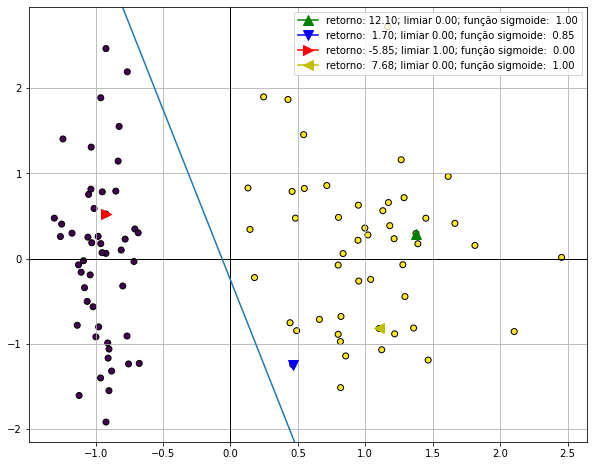

In [4]:
makers = ['^', 'v', '>', '<']
colors = ['g', 'b', 'r', 'y']

# Pesos e viés pré-definidos.
w1 = 8
w2 = 2
b = 0.5

plt.figure(figsize=(10,8))
plotmodel(w1,w2,b)

# Instanciando o perceptron, que é um neurônio 
# que opera em seu processamento a partir de uma 
# função linear para tomar a classificação dos dados
# entrados no neurônio. Por outro lado, há apenas uma saida. 
perceptron = nn.Linear(2,1)

# Aqui estou pré-determinando os valores do peso e viés, 
# ao invés do que seria gerado aleatoriamente pelo sistema. 
perceptron.weight = nn.Parameter(torch.Tensor([[w1,w2]]))
perceptron.bias = nn.Parameter(torch.Tensor([b]))

# Ativando a função de saida que é do tipo sigmoide. 
# Lembrando que a função de saida é responsável por 
# passar a informação adiante ou não, semelhante 
# a como funciona os axônios dos neurônios. 
ativando = nn.Sigmoid()

for k, idx in enumerate([17, 21, 43, 66]):

  # Aqui estarei armazenando as coordenadas de
  # cada elemento, do 17 ao 66.
  x = torch.Tensor(X[idx])

  # O que estou nomeando como retorno são os dados
  # que passaram pelo perceptron, que são retornados
  # cada quais com seu respectivo valor e, assim, 
  # passando-os para a função de ativação
  retorno = perceptron(x)
  funcao_ativada = ativando(retorno)

  ativacao_limiar = 0 if retorno.data > 0 else 1
  label = "retorno: {:5.2f}".format(retorno.data.numpy()[0]) + "; limiar {:4.2f}".format(ativacao_limiar) + "; função sigmoide: {:5.2f}".format(funcao_ativada.data.numpy()[0])
  plt.plot(x[0], x[1], marker = makers[k], color = colors[k], markersize=10, label = label)

plt.legend()
plt.show

# Olhando para o gráfico abaixo eu cosigo observar em como as
# funções de saida trabalham sobre a lógica da função limiar e 
# função sigmoide. Percebe-se como os valores retornados apresentam
# para cada função de saida um retorno diferente.

# Definindo uma arquitetura com o Pytorch:

O módulo nn.Sequential é um container onde se pode colocar múltiplos módulos. Ao realizar um forward em um objeto Sequential ele aplicará sequencialmente os módulos nele contidas para gerar uma saída.

Segue abaixo um exemplo desse módulo contendo 2 camadas Linear intercaladas por uma função de ativação ReLU.

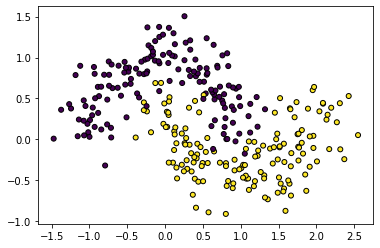

In [5]:
from sklearn.datasets import make_moons
import matplotlib.pyplot as plt

X1, Y1 = make_moons(n_samples=300, noise=0.2)
plt.scatter(X1[:, 0], X1[:, 1], marker='o', 
 c=Y1, s=25, edgecolor='k')

In [6]:
input_size = 2 
hidden_size = 8
output_size = 1

# Instanciando o nn.Sequential e passando as respectivas camadas pertinentes, 
# contando com a camada de entrada, que é a camada de dimensionalidade da rede, e
# a de saida, que contém a quantidade de neurônios que queremos ter os quais 
# terão como função a ReLU. Do mesmo modo, após a ReLU, instancio mais uma camada
# que irá receber os dados subsequentes à ReLU e passará à saída. 
rede_neural = nn.Sequential(nn.Linear(in_features = input_size, out_features = hidden_size), 
                            nn.ReLU(), 
                            nn.Linear(in_features=hidden_size, out_features = output_size))

In [7]:
# Para visualizar as informações sobre a rede, podemos acessar por meio da biblioteca summary:
from torchsummary import summary

# Para, de fato, acessar o sumário passamos como parâmetro 
# a rede em questão e suas entradas. 
summary(rede_neural, input_size=(1, input_size))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Linear-1                 [-1, 1, 8]              24
              ReLU-2                 [-1, 1, 8]               0
            Linear-3                 [-1, 1, 1]               9
Total params: 33
Trainable params: 33
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.00
Params size (MB): 0.00
Estimated Total Size (MB): 0.00
----------------------------------------------------------------


# Passando a informação adiante (Forward):

In [8]:
# Perceba que há um float que termina a variável tensor. 
# Ele é importante pois por padrão as redes neurais 
# operam segundo um float de 32 e não 64, que por vezes
# estão nos tipos de arrays numpy
tensor = torch.from_numpy(X1).float()
predict = rede_neural(tensor)

In [9]:
print(tensor)
print("")
print(X1)

# Olhe a diferença de um tensor perante a um array numpy. 
# O primeiro conta com apenas um colchete formando sua matriz, 
# enquanto que o segundo duas. Por isso que devemos transformar
# do numpy em tensor com o uso do torch. 

tensor([[ 8.0393e-01, -2.9141e-01],
        [ 2.3144e+00, -1.2224e-01],
        [-2.8039e-01,  4.5094e-01],
        [ 7.8945e-01,  3.8406e-01],
        [ 1.1867e+00, -5.1144e-01],
        [ 1.0068e+00, -3.5143e-01],
        [ 3.4412e-01, -1.6941e-01],
        [-4.5583e-01,  6.7847e-01],
        [ 8.0924e-01,  2.6343e-03],
        [ 2.7776e-01,  1.5456e-02],
        [ 1.3865e+00, -1.1288e-01],
        [ 4.0685e-01,  7.7091e-01],
        [ 1.0749e+00, -4.8035e-01],
        [ 7.5715e-01,  1.0260e+00],
        [ 2.7307e-02,  1.5173e-01],
        [ 1.1073e+00, -6.1806e-01],
        [ 2.0387e+00,  3.4216e-01],
        [ 7.2397e-01, -2.8538e-01],
        [-7.1231e-01,  2.2544e-02],
        [ 3.1577e-01,  3.8662e-01],
        [-2.7270e-02,  1.0325e+00],
        [-9.5601e-01,  3.8807e-01],
        [ 1.5269e+00, -5.4070e-01],
        [ 1.5042e+00, -4.6584e-01],
        [-9.4036e-01,  8.8418e-01],
        [ 5.4996e-01,  7.9030e-01],
        [ 1.7502e+00,  6.2561e-02],
        [ 2.3085e+00,  4.414

In [10]:
print(X1.shape)
print("")
print(predict.size())

(300, 2)

torch.Size([300, 1])


In [11]:
# Aqui vemos a diferença ao passar os dados pela rede e ao não passar.
# No primeiro print temos 300 linhas de dados com duas colunas. No segundo, 
# contamos com a mesma quantidade de linhas, porém com quantidade de colunas diferentes, 
# decorrentes do tipo de saida da rede. 

# Classe nn.Module:

A forma mais organizada de definir modelos em PyTorch é implementando uma classe nos moldes da classe nn.Module. Para redes pequenas, como as que estamos aprendendo até o momento, sua importância pode não se destacar, mas modelos maiores e com funcionalidades mais complexas, são mais fáceis de implementar e realizar manutenções dessa forma.

Funções obrigatórias do nn.Module.

__init()__: definição de hiperparâmetros e instância do modelo
forward(): Fluxo da entrada para produzir uma saída

In [12]:
class Rede_Neural(nn.Module):
  
  # Aqui há a subcamada da classe, que corresponde a inicialização
  # Percebe-se isso devido ao init, de initializer. 
  # Como parâmetros temos o self, que é obrigatório, 
  # além do tamanho da entrada, da camada escondida e da saida.
  def __init__(self, input_size, hidden_size, output_size):
    super(Rede_Neural, self).__init__()
    
    # Definir a arquitetura
    self.hidden = nn.Linear(input_size, hidden_size)
    self.relu   = nn.ReLU()
    self.output = nn.Linear(hidden_size, output_size)
    
  def forward(self, X):
    
    # Gerar uma saída a partir do X
    # Aqui na camada hidden estou recebendo 
    # o valor de entrada da última camada que 
    # se encontrava na sub classe acima e
    # a transformando novamente de função linear
    # para função não linear do tipo ReLU. 
    hidden = self.relu(self.hidden(X))

    # Depois basta passar a informação para a saida. 
    output = self.output(hidden)
    
    return output

In [13]:
input_size = 2
hidden_size = 8
output_size = 1

# A partir do momento que chamo a rede neural, passando os respectivos
# parâmetros, inicializa-se a sub camada _init_, que inicializa de fato
# o processo da aprendizagem da rede para depois passar à camda de saida. 
net = Rede_Neural(input_size,hidden_size, output_size)

print(X1.shape)
tensor = torch.from_numpy(X1).float()
pred   = net(tensor)
print(pred.size())

# Por meio desses prints, vemos que criando a rede por meio 
# do Sequential ou através de uma classe, obtemos os mesmos resultados. 

(300, 2)
torch.Size([300, 1])
